<a href="https://colab.research.google.com/github/ChrisDaVillager/sales-predictions/blob/main/Sales_Predictions_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount & Import**

In [62]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [63]:
# importing necessary libraries for data viz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
set_config(display='diagram')

In [64]:
filename = '/content/drive/MyDrive/Stack 1/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Project 1 - Part 2**

**1. How many rows and columns?**

In [65]:
# 8523 rows 12 columns

df.shape

(8523, 12)

**2. What are the datatypes of each variable?**

In [66]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3. Are there duplicates? If so, drop any duplicates.**

In [67]:
df.duplicated().sum()

0

**4. Identify missing values**

In [68]:
# identify missing values and align in descending to read easier

df.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice)**

In [69]:
# figure out the sum of the total items and fill in 
# will fill in average weight of items for 'Item_Weight'
# missing values are 17% of the total values
# replacing with average shouldn't hurt since this is based on sales
# item weight for sales shouldn't account for anything relevant

df['Item_Weight'].mean().round(2)

12.86

In [70]:
# set filter for avg of weight
# fill missing values with avg

avg_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(avg_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [71]:
# size of outlet seems irrelevant
# any missing values inside of outlet_size can be filled in with
# values from previous rows

df.ffill(inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**6. Confirm that there are no missing values after addressing them.**

In [72]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)**

In [73]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [74]:
# identified inconsistent values in the fat content

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [75]:
# replace LF & low fat with Low Fat

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'],'Low Fat')

In [76]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [77]:
# replace reg with Regular

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')

In [78]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8. For any numerical columns, obtain the summary statistics of each (min, max, mean)**

In [79]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [81]:
df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


#**Project 1 - Part 3**

**Histogram to view the distributions of various features in your dataset.** 

In [82]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0, 0.5, 'Number of Items')

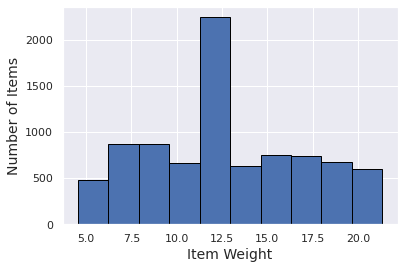

In [83]:
# providing histogram data viz on item weight using matplotlib
# provide additional elements to make viz more presentable
# citing: https://www.statology.org/change-font-size-matplotlib/ for 'size' element to increase font size

sns.set(style = 'darkgrid')

plt.hist(df['Item_Weight'], edgecolor = 'black')
plt.xlabel('Item Weight', size = 14)
plt.ylabel('Number of Items', size = 14)

This histogram shows the minimum and maximum weight of the provided items in the dataset. More items have a weight between ~11-12 lbs. 

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

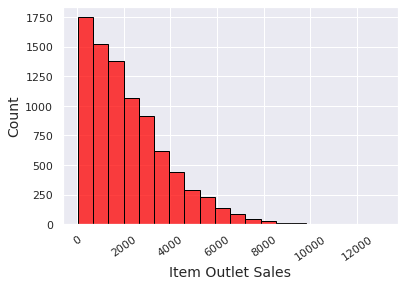

In [84]:
# histogram data viz on outlet sales using seaborn
# decreased the amount of bins to make histogram easier to see instead of having to squint
# added a bit of style to this histogram

sns.set(style = 'darkgrid')

sns.histplot(data=df, x = 'Item_Outlet_Sales', color ='red', edgecolor = 'black', bins = 20)
plt.ylabel('Count', size=14)
plt.xlabel('Item Outlet Sales', size=14)
plt.xticks(rotation = 35)

The above histogram displays the amount/value of sales per item. Majority of items were sold cheaper, yet these items could be a higher demand item. 

**Boxplot to view statistical summaries of various features in your dataset.**

Text(0.5, 0, 'Item Fat Content')

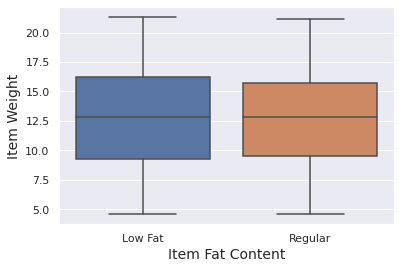

In [85]:
# creating boxplot data viz for item fat content by item weight

sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
plt.ylabel('Item Weight', size=14)
plt.xlabel('Item Fat Content', size=14)

The above boxplot displays the distribution of the items weight, based on the item fat content. Low Fat and Regular have very slight differences

**Heatmap of the correlation between features.**

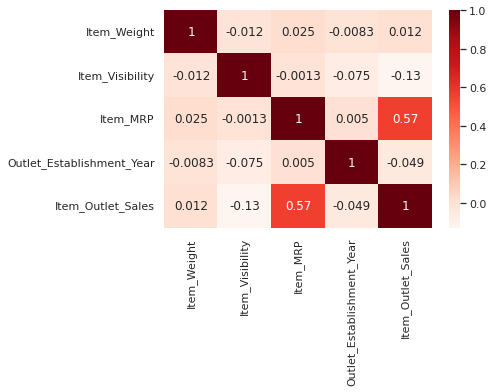

In [86]:
# creating correlation heatmap for all provided data

corr = df.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True)

The above heatmap shows the correlation between all the provided data and their counterparts. There is a moderate correlation between Item MRP and Item Outlet Sales.

# **Project 1 - Part 4**
* Build on your previous cleaning, exploration, and analysis
* Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis)
*Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [87]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [89]:
# changing column names to remove underscores

df = df.rename(columns = {'Item_Identifier':'Item Identifier','Item_Weight':'Item Weight','Item_Fat_Content':'Item Fat Content','Item_Visibility':'Item Visibility',
                          'Item_Type':'Item Type','Item_MRP':'Item MRP','Outlet_Identifier':'Outlet Identifier','Outlet_Establishment_Year':'Outlet Establishment Year',
                          'Outlet_Size':'Outlet Size','Outlet_Location_Type':'Outlet Location Type','Outlet_Type':'Outlet Type','Item_Outlet_Sales':'Item Outlet Sales'})
df.head()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Visualization 1**

In [90]:
def tens(x,pos):
    return f'{x*1e-0:.0f}'

def plot_info(data,x='Item Weight',figsize=(12,6),format_weight=True):
    fig, ax = plt.subplots(figsize=figsize)

    sns.histplot(data=df,x=x,ax=ax, color='r', edgecolor='k')
    ax.set_title('Item Weight Distribution',
                 fontsize=18,
                 fontweight='bold');

    mean_weight = df[x].mean()
    ax.axvline(mean_weight,color='blue',ls='--',lw=3,
               label=f'Average Item Weight= {mean_weight:,.0f}lbs',);

    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                  fontsize='x-large')
    plt.ylabel('Count',fontsize='x-large')

    ax.legend();

    if format_weight:

       weight_fmt = FuncFormatter(tens)
       ax.xaxis.set_major_formatter(weight_fmt)

    return fig,ax

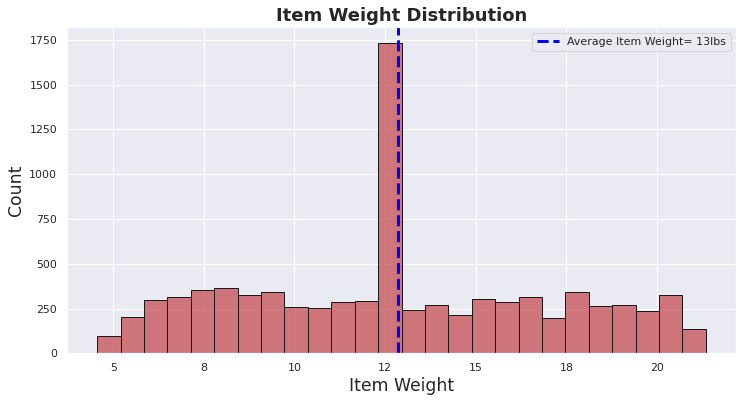

In [91]:
plot_info(df);

**Data Visualization 2**

Text(0.5, 0.98, 'Item Sales MRP vs Outlet Sales')

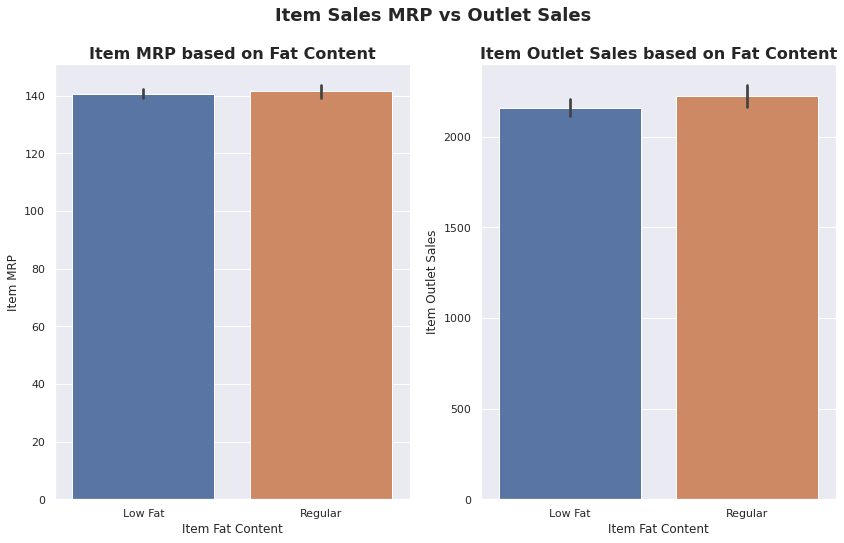

In [92]:
fig, axes = plt.subplots(ncols=2, figsize=(14,8))

sns.barplot(data=df, x='Item Fat Content', y='Item MRP', ax=axes[0])
axes[0].set_title('Item MRP based on Fat Content', fontsize=16, fontweight='semibold')

sns.barplot(data=df, x='Item Fat Content', y='Item Outlet Sales', ax=axes[1])
axes[1].set_title('Item Outlet Sales based on Fat Content', fontsize=16, fontweight='semibold')

fig.suptitle('Item Sales MRP vs Outlet Sales', fontsize=18, fontweight='bold')

# **Project 1 - Part 5**
* Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  
* Perform a train test split 
* Create a preprocessing object to prepare the dataset for Machine Learning
* **Please note: If you imputed missing values based on a calculation on the entire dataset (such as mean), you should now perform that step after the train test split using SimpleImputer.**

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Identifier            8523 non-null   object 
 1   Item Weight                8523 non-null   float64
 2   Item Fat Content           8523 non-null   object 
 3   Item Visibility            8523 non-null   float64
 4   Item Type                  8523 non-null   object 
 5   Item MRP                   8523 non-null   float64
 6   Outlet Identifier          8523 non-null   object 
 7   Outlet Establishment Year  8523 non-null   int64  
 8   Outlet Size                8523 non-null   object 
 9   Outlet Location Type       8523 non-null   object 
 10  Outlet Type                8523 non-null   object 
 11  Item Outlet Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [94]:
df.head()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [95]:
# creating copy of dataframe
# RESUBMISSION: creating a copy of the dataframe allows us to prevent any data leakage
# RESUB cont: would not want to use original DF for machine learning

df_ml = df.copy()

In [96]:
df_ml.head()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
# checking for any missing values of the new dataframe

df_ml.isna().sum().sum()

0

In [98]:
# checking for any duplicate values of the new dataframe

df_ml.duplicated().sum()

0

In [99]:
df_ml.describe()

,Item Weight,Item Visibility,Item MRP,Outlet Establishment Year,Item Outlet Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Identify the features (X) and target (y): Assign the "Item Outlet Sales" column as your target and the rest of the relevant variables as your features matrix.**

In [100]:
# defining features(X) and target(y)
X = df_ml[['Item Weight', 'Item Visibility', 'Item MRP', 'Outlet Establishment Year']]
y = df_ml['Item Outlet Sales']

**Perform a train test split**

In [101]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Create a preprocessing object to prepare the dataset for Machine Learning**
* Will be using pipeline method to cut down code complexity

In [102]:
# create selectors
numerical_selector = make_column_selector(dtype_include='number')
categorical_selector = make_column_selector(dtype_include='object')

**Create imputers**
* Create freq_imputer to fill in missing categorical values with the most frequent value. Using the most frequent value should not impact dataset outcome 
* Create mean_imputer to fill in missing numerical values with the mean. Filling in missing values with the mean could help provide better data visualization. There doesn't seem to be many outliers while checking .describe()


In [103]:
# instantiate transformers
# create imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# define scaler
scaler = StandardScaler()

# define one-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [104]:
# instantiate pipelines - numerical
numerical_pipeline = make_pipeline(mean_imputer, scaler)
numerical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [105]:
# instantiate pipelines - categorical
categorical_pipeline = make_pipeline(freq_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [106]:
# columntransformer
# create tuples in order to match transformers with corresponding datatypes
numerical_tuple = (numerical_pipeline, numerical_selector)
categorical_tuple = (categorical_pipeline, categorical_selector)

# transform tuples into preprocessor
# RESUBMISSION: added third parameter 'remainder='passthrough''
# RESUBMISSION cont: what this pararmeter does, every other column that was not included in 'transformers' will be passed through

preprocessor = make_column_transformer(numerical_tuple, categorical_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d6177550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d6177850>)])

In [107]:
# fit preprocessor to training data NOT testing data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d6177550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d6177850>)])

In [108]:
# transform training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [109]:
# inspect data
print(np.isnan(X_train_processed).sum().sum(), 'Missing Values in Training Data')
print(np.isnan(X_test_processed).sum().sum(), 'Missing Values in Testing Data')
print('\n')
print('Data in X_train_processed are', X_train_processed.dtype)
print('Data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('Data shape is', X_train_processed.shape)
print('\n')
X_train_processed

0 Missing Values in Training Data
0 Missing Values in Testing Data


Data in X_train_processed are float64
Data in X_test_processed are float64


Data shape is (6392, 4)




array([[ 0.81916441, -0.71277507,  1.82810922,  1.32784893],
       [ 0.55825754, -1.29105225,  0.60336888,  1.32784893],
       [-0.12958785,  1.81331864,  0.24454056,  0.13618724],
       ...,
       [ 1.11564949, -0.92052713,  1.52302674,  0.49368575],
       [ 1.76791667, -0.2277552 , -0.38377708,  1.0895166 ],
       [ 0.81916441, -0.95867683, -0.73836105, -0.10214509]])

# **Project Final**
1. Your first task is to build a linear regression model to predict sales.
  * Build a linear regression model.
  * Evaluate the performance of your model based on r^2.
  * Evaluate the performance of your model based on rmse.
2. Your second task is to build a regression tree model to predict sales.
  * Build a simple regression tree model.
  * Compare the performance of your model based on r^2.
  * Compare the performance of your model based on rmse.  
3. You now have tried 2 different models on your data set. You need to determine which model to implement.
  * Overall, which model do you recommend?
  * Justify your recommendation.  
4. To finalize this project, complete a README in your GitHub repository including:
  * An overview of the project
  * 2 relevant insights from the data (supported with reporting quality visualizations)
  * Summary of the model and its evaluation metrics
  * Final recommendations.

In [110]:
# we will continue to use our copy of the dataframe that was tailored to ML

df_ml.head()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [111]:
df_ml.info()

df_ml.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Identifier            8523 non-null   object 
 1   Item Weight                8523 non-null   float64
 2   Item Fat Content           8523 non-null   object 
 3   Item Visibility            8523 non-null   float64
 4   Item Type                  8523 non-null   object 
 5   Item MRP                   8523 non-null   float64
 6   Outlet Identifier          8523 non-null   object 
 7   Outlet Establishment Year  8523 non-null   int64  
 8   Outlet Size                8523 non-null   object 
 9   Outlet Location Type       8523 non-null   object 
 10  Outlet Type                8523 non-null   object 
 11  Item Outlet Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item Weight,Item Visibility,Item MRP,Outlet Establishment Year,Item Outlet Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Your first task is to build a linear regression model to predict sales**
* Since we have already created our preprocessor in the previous section of our Project, we will be moving those over into this final version
* Will run preprocessor in this section, prior to creating linear regression, to ensure code is working
* REMINDER: We are focusing on 'Item Outlet Sales'

In [112]:
# we will define evaluation to reduce complexity of code
def evaluation_reg(true, pred):
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'RMSE: {rmse},\n R^2: {r2} ')

In [113]:
# checking preprocessor

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d6177550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d6177850>)])

In [114]:
# now we will instantiate our linear regression model
lin_reg = LinearRegression()

# after instantiating, combine with preprocessor & fit model
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

# ALWAYS fit to training set, NOT testing set
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d6177550>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d6177850>)])),
                ('linearregression', LinearRegression())])

In [115]:
# create model predictions on training and testing sets
train_predict = lin_reg_pipe.predict(X_train)
test_predict = lin_reg_pipe.predict(X_test)

**Evaluate the performance of your model based on r^2 & RMSE**

In [116]:
# we will now run our evaluation on training set
evaluation_reg(y_train, train_predict)

RMSE: 1393.7846152297814,
 R^2: 0.34358350061468335 


In [117]:
# run our evaluation on testing set
evaluation_reg(y_test, test_predict)

RMSE: 1354.4088227920015,
 R^2: 0.3351075170629061 


**Your second task is to build a regression tree model to predict sales**
  * Build a simple regression tree model.
  * Compare the performance of your model based on r^2.
  * Compare the performance of your model based on rmse.

In [118]:
df_ml.head()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Identifier            8523 non-null   object 
 1   Item Weight                8523 non-null   float64
 2   Item Fat Content           8523 non-null   object 
 3   Item Visibility            8523 non-null   float64
 4   Item Type                  8523 non-null   object 
 5   Item MRP                   8523 non-null   float64
 6   Outlet Identifier          8523 non-null   object 
 7   Outlet Establishment Year  8523 non-null   int64  
 8   Outlet Size                8523 non-null   object 
 9   Outlet Location Type       8523 non-null   object 
 10  Outlet Type                8523 non-null   object 
 11  Item Outlet Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Import 'DecisionTreeRegressor' model**
* This was imported at the top of our notebook

In [120]:
# checking model - nothing will occur since nothing has been done just yet
DecisionTreeRegressor()

DecisionTreeRegressor()

In [121]:
# creating instance of model
# we will continue to use 'random_state=42' for consistency
dec_tree = DecisionTreeRegressor(random_state=42)

In [122]:
# fit model on the TRAINING set
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [123]:
# evaluate our model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 1.0
Testing Score: -0.23491878604629002


In [124]:
# explore what could be tuned
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [125]:
# get the max_depth of our decision tree
# we have a max_depth of 40
dec_tree.get_depth()

40

In [126]:
# to go a little further, we will check to see how many lead(terminal) nodes we have
dec_tree.get_n_leaves()

6299

**Find optimal max_depth**
* In this step, we will be hyperparameter tuning
* Our max depth is 40, so we will create a range from 1 - 41

In [127]:
# list of values to explore max_depth
depths = list(range(1, 41))

# dataframe to store scores values of max_depth
scores = pd.DataFrame(index=depths, columns=['Test Score', 'Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_train, y_train)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

Text(0, 0.5, 'R2 Score')

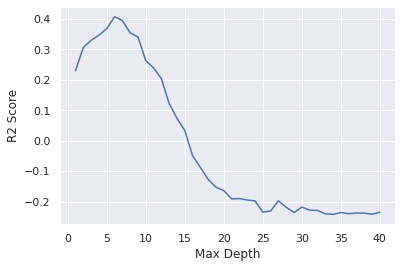

In [128]:
# create data visualization max_depth leads to highest r2 score
plt.plot(depths, scores['Test Score'])
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')

* According to this data visualization, the best score occurs when the max_depth is 6
* We will sort our 'df_ml' by best score to find a more accurate max_depth

In [129]:
scores_sorted = scores.sort_values(by='Test Score', ascending=False)
scores_sorted.head()

,Test Score,Train Score
6,0.406581,0.444605
7,0.39423,0.468668
5,0.367883,0.38849
8,0.353557,0.502073
4,0.346038,0.357177


Our prediction of max_depth of 6 was correct. We will now run a model with optimal value for max_depth

In [130]:
dec_tree_6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print(train_6_score)
print(test_6_score)

0.44460542467991104
0.40658109020227284


**You now have tried 2 different models on your data set. You need to determine which model to implement**
* Based on the models that we have ran, we would recommend using the our Regression Tree model. The regression tree model, although takes a little longer to get to our desired outcome, provides us with more accurate values when presenting to our clientele. 